import pandas as pd
import numpy as np

train=pd.read_csv(r'C:\Users\user\Desktop\python\train.csv')
train.head()

In [2]:
# !pip install pandas_profiling


In [3]:
# 数据探索性分析
# import pandas_profiling as pdf
# pdf.ProfileReport(train)

In [4]:
# 特征值处理
# 对标签房价处理，使之尽量成正态分布
# !pip install seaborn

F:\Download\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

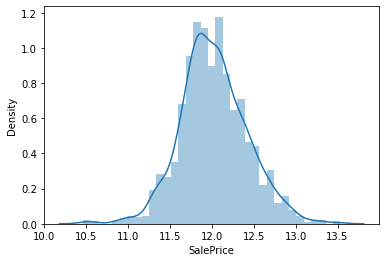

In [5]:
import seaborn as sns
y_train=np.log1p(train.pop('SalePrice'))
sns.distplot(y_train)

In [6]:
# 问题：为什么要正态分布，怎样辨别是正态分布，怎样正态分布？

In [7]:
# 数据联合，将测试集接在训练集后面，等特征处理完毕后再拆分出来单独训练和预测
test=pd.read_csv(r'C:\Users\user\Desktop\python\test.csv')
test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
all_df=pd.concat((train,test),axis=0)
all_df.shape

(2919, 80)

In [9]:
# one_hot 处理
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [10]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
all_dummy_df=pd.get_dummies(all_df)
all_dummy_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
# 缺失值处理
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
dtype: int64

In [13]:
mean_cols=all_dummy_df.mean()
mean_cols.head(10)

Id               1460.000000
MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
dtype: float64

In [27]:
all_dummy_df=all_dummy_df.fillna(mean_cols)
all_dummy_df.isnull().sum().sum()
# 检查后缺失值为零，验证了平均值填充完毕

0

In [28]:
# 标准化数据，归一化
numeric_cols=alldata.columns[alldata.dtypes!='object']
numeric_cols

NameError: name 'alldata' is not defined

In [ ]:
# 以上数据都是数值型，再次对每个特征数据进行归一化处理，这里采用（x-x')/s来处理
numeric_col_mean=all_dummy_df.loc[:,numeric_cols].mean()
numeric_col_std=all_dummy_df.loc[:,numeric_cols].std()
all_dummy_df.loc[:,numeric_cols]=(all_dummy_df.loc[:,numeric_cols]-numeric_col_mean)/numeric_col_std

In [30]:
dummy_train_df=all_dummy_df.iloc[0:1460,:]
dummy_test_df=all_dummy_df.iloc[1460:2920,:]
train.index
# print(test.index)
dummy_train_df.shape,dummy_test_df.shape



((1460, 289), (1459, 289))

In [17]:
!pip install sklearn

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [19]:
alphas=np.logspace(-3,2,50)
alphas

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [20]:
!pip install matplotlib

In [31]:
dummy_train_df.values

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

Text(0.5, 1.0, 'Alpha vs cv Error')

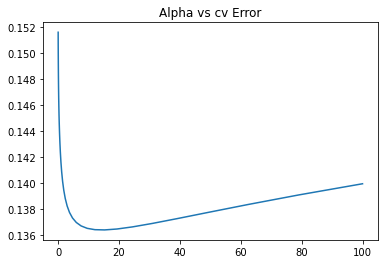

In [21]:
# 交叉验证，储存不同的alpha下的均方误差
x_train=dummy_train_df.values
x_test=dummy_test_df.values
test_scores=[]
for alpha in alphas:
    clf=Ridge(alpha)
    test_score=np.sqrt(-cross_val_score(clf,x_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

import matplotlib.pyplot as plt
plt.plot(alphas,test_scores)
plt.show
plt.title('Alpha vs cv Error')


Text(0.5, 1.0, 'N_estinator vs CV Error')

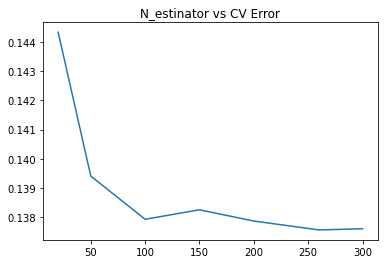

In [22]:
# 随机森林
# n_estimators：表示森林里树的个数；
# max_features：随机选择特征集合的子集合，并用来分割节点。
# 将树的个数作为变量，定子集0.3倍的特征，来探索多少树个数能得到好的效果。
from  sklearn.ensemble import RandomForestRegressor
N_estinators=[20,50,100,150,200,260,300]
test_scores=[]
for N in N_estinators:
    clf=RandomForestRegressor(n_estimators=N,max_features=0.3)
    test_score=np.sqrt(-cross_val_score(clf,x_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(N_estinators,test_scores)
plt.show
plt.title('N_estinator vs CV Error')

In [23]:
# 集成学习ensemble
ridge=Ridge(alpha=15)
rf=RandomForestRegressor(n_estimators=350,max_features=0.3)
ridge.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestRegressor(max_features=0.3, n_estimators=350)

In [24]:
# 进行预测，并将数据进行指数转换（因为前面有对房价数据进行log处理）
ridge_predict=ridge.predict(x_test)
rf_predict=rf.predict(x_test)
test_score=rf.score(x_train,y_train)
print(test_score)
y_ridge=np.expm1(ridge_predict)
y_rf=np.expm1(rf_predict)


0.9837494428922698


In [25]:
y_final=(y_ridge+y_rf)/2

In [26]:
# 提交结果
submission_df=pd.DataFrame(data={'ID':test.iloc[:,0],'SalePrice':y_final})
submission_df.head()

,ID,SalePrice
0,1461,118486.460526
1,1462,150212.120127
2,1463,173943.608085
3,1464,188157.598860
4,1465,194467.261421


In [ ]:
submission_df.to_csv('ensemble_ridge_randomForest.csv',index=False)